In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
df=pd.read_csv("ab_data.csv")

In [24]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [25]:
df.shape

(294478, 5)

In [26]:
df[['user_id', 'group', 'landing_page']].value_counts()

user_id  group      landing_page
773192   treatment  new_page        2
840613   treatment  new_page        1
840667   control    old_page        1
840666   control    old_page        1
840664   treatment  new_page        1
                                   ..
735267   treatment  new_page        1
735268   control    old_page        1
735270   control    old_page        1
735271   control    old_page        1
945999   treatment  new_page        1
Name: count, Length: 294477, dtype: int64

In [47]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [28]:
idx_control_newpage=(df['group']=='control') & (df['landing_page']=='new_page')

In [29]:
idx_treatment_oldpage=(df['group']=='treatment') & (df['landing_page']=='old_page')

In [30]:
(idx_control_newpage | idx_treatment_oldpage).sum()

3893

In [31]:
idx_control_newpage

0         False
1         False
2         False
3         False
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477    False
Length: 294478, dtype: bool

In [48]:
df=df[~(idx_control_newpage | idx_treatment_oldpage)]

In [49]:
pd.crosstab(df['group'],df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


In [50]:
df["converted"].mean()

0.11959667567149027

In [57]:
pct_control=df[df["group"]=="control"]['converted'].mean()*100

In [58]:
pct_treatment=df[df["group"]=="treatment"]['converted'].mean()*100

In [59]:
pct_control, pct_treatment

(12.03863045004612, 11.880724790277405)

In [60]:
observed_pct= pct_treatment-pct_control

In [61]:
observed_pct

-0.15790565976871562

### Permutation test

In [74]:
np.random.permutation(df['converted']) 

array([0, 1, 0, ..., 0, 0, 0])

In [136]:
n_params=2000
perm_pct_diffs=np.zeros(n_params)
df_simulation=df.copy()

In [137]:
for i in range(n_params):
    df_simulation['converted']=np.random.permutation(df['converted'])
    pct_control=df_simulation[df_simulation['group']=='control']['converted'].mean()*100
    pct_treatment=df_simulation[df_simulation['group']=='treatment']['converted'].mean()*100
    perm_diff=pct_treatment-pct_control
    perm_pct_diffs[i]=perm_diff
    

In [138]:
pct_control, pct_treatment

(11.923675261918856, 11.995650707792253)

<Axes: ylabel='Count'>

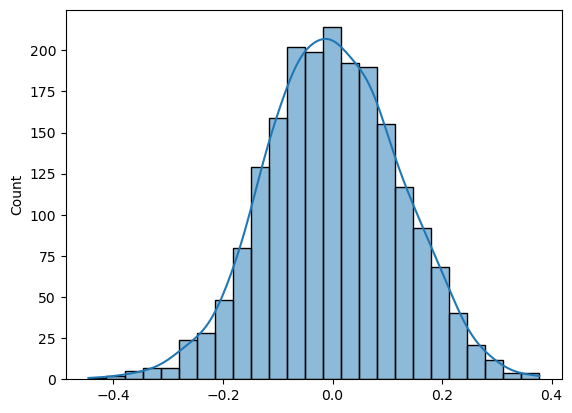

In [139]:
sns.histplot(perm_pct_diffs,bins=25,kde=True)

In [140]:
100*((perm_pct_diffs <= observed_pct).sum()/n_params)

9.1

In [ ]:
ss